# 운영체제 과제 01
- 201901763 이지호

과제 1
마감 : 4월 30일(일) 저녁 6시까지
내용 :
수업때 이야기한 모든 스케줄링 방법을 구현하고 성능(5가지) 비교
Json 파일로 입력정보를 주면 포맷을 체크해서 비교판단
실시간스케줄링과 비실시간스케줄링을 Json  입력파일로 자동 구분처리
파이썬만 사용, 간트차트 출력을 포함하여 5가지를 모두 비교하고, 각 입력 데이터에 대해 그 중 종합적으로 제일 나은 방법을 "자동" 결과 리포팅 (리포팅 내용을 간단한 설명을 포함하여 자동 생성)
숫자 결과와 그래픽결과를 모두 나타내고 자동으로 리포팅
chatGPT 포함한 외부 자료 사용 절대 금함. 특성을 이미 잘 알고 있으므로,  사용흔적이 보이면 0점 처리

MarkDown 문서로 설명과 해설 그리고 주석이 포함된 주피터노트북 파일(*.ipynb 파일) 과 해당 파일을 PDF 로 저장한 파일, 
입력에 사용하는 json 파일 3개 (입력예제 3개임) 등, 
총 5개를 이러닝 사이트에 제출함.

실행 결과는 절대 평가함. (제대로 되었는지 여부, 제출한 입력 포맷에 평가 데이터를 적용해서 진행)
전체 결과는 등급제로 상대 평가함. 열심히 코드 만들고, 열심히 최선의 결과를 잘 만든 사람에게 높은 등급

위 내용을 기준으로 추가로 필요한 부분은 스스로 판단해서 진행하면 됨. 의도에서 벗어나거나 축소되면 안됨.


- First-come, First-Served (선입선출)
- Shortest-Job-First (최단작업우선)
- Shortest-remaining-time-first (최단잔여시간우선)
- Priority (우선순위)
- Round robin(퀀텀타임대로 순회)
- Priority + Round robin

## Load data
- 아래 변수 숫자 (int) 변경해가며, (1), (2), (3)번 case 마다 실행 가능.

In [516]:
# case_[NUM] 변경해가며 출력 가능
_casenum = 1

In [517]:
import json
import math
import matplotlib.pyplot as plt

_jsonfilename = "case" + str(_casenum) + ".json"
with open(_jsonfilename) as f:
    json_object = json.load(f)

num_of_processs = len(json_object['list'])
print("Num of Process :", num_of_processs)

# data checking
assert json_object['list']
for i in range(num_of_processs):
    assert json_object['list'][i]["Num"] > 0
    assert json_object['list'][i]["Burst_time"] >= 1
    assert json_object['list'][i]["Priority"] >= 0
    assert json_object['list'][i]["Arrival_time"] >= 0
print("Data Loading Sucess")

Num of Process : 4
Data Loading Sucess


## Function; draw Gantt chart in terminal

In [518]:
def draw(_process, _hope):
    fig, ax = plt.subplots(figsize=(10, 1))

    _now_time = 0
    _count_waiting_time = 0

    _xlim_tickers = []

    for _pid, _runtime in _hope:
        # ALL JOP IS DONE
        if (_pid < 0):
            break
        # TAKE A REST
        elif (_pid == 999):
            _now_time += _runtime
        # CPU RUNNUNG
        else:
            ax.barh(0, _runtime, left=_now_time, edgecolor='black')
            _now_time += _runtime
            ax.text(_now_time - _runtime/2, 0, ('P'+str(_pid)), ha='center', va='center')
            # if(_process[_pid]['Burst_time'] > 0):
            #     print(_process[_pid]['Burst_time'])
            #     _process[_pid]['Burst_time'] -= _runtime
            # else:
            #     print(_pid,"is done")
            # count waiting time
            
        _xlim_tickers.append(_now_time)

    ax.set_xticks(_xlim_tickers)
    ax.set_xlim([0, _now_time])
    ax.set_yticks([])
    plt.show()

    # print value
    # _average_waiting_time

## First-come, First-Served (선입선출)

[[1, 10], [2, 14], [999, 10], [3, 102], [4, 12], [-1, -1]]


/var/folders/5c/wv993t2x5_j6ck444smxp6t00000gn/T/ipykernel_28306/1557437140.py:32: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([0, _now_time])


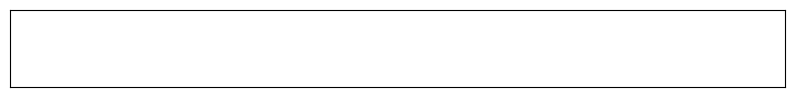

In [519]:
hope = []
tmp = sorted(json_object['list'], key=lambda x: x['Arrival_time'])
for i in tmp:
    hope.append([i['Num'], i['Burst_time']])

hope.append([-1, -1])
hope.insert(2, [999, 10])
print(hope)
draw(tmp, hope)


## Priority First Served (우선순위먼저)

[[3, 102], [4, 12], [1, 10], [2, 14], [-1, -1]]


/var/folders/5c/wv993t2x5_j6ck444smxp6t00000gn/T/ipykernel_28306/1557437140.py:32: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([0, _now_time])


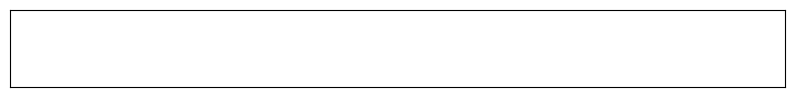

In [520]:
hope = []
tmp = sorted(json_object['list'], key=lambda x: x['Priority'])
for i in tmp:
    hope.append([i['Num'], i['Burst_time']])
hope.append([-1, -1])
print(hope)
draw(tmp, hope)
